# LeNet Lab
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Load the German traffic sign data,

You do not need to modify this section.
## summary of the dataset 
German Traffic Sign dataset consists of 43 different traffic sign with each distinct image having 32×32 size. This dataset has 34799 images as training dataset and 12,630 images as a test dataset. 

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
print(X_train.shape, len(y_train))
print(X_valid.shape, len(y_valid))
print(X_test.shape, len(y_test))

(34799, 32, 32, 3) 34799
(4410, 32, 32, 3) 4410
(12630, 32, 32, 3) 12630


In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


## Visualize Data

View a sample from the dataset.

You do not need to modify this section.
We can use other visualization methods such as Histogram

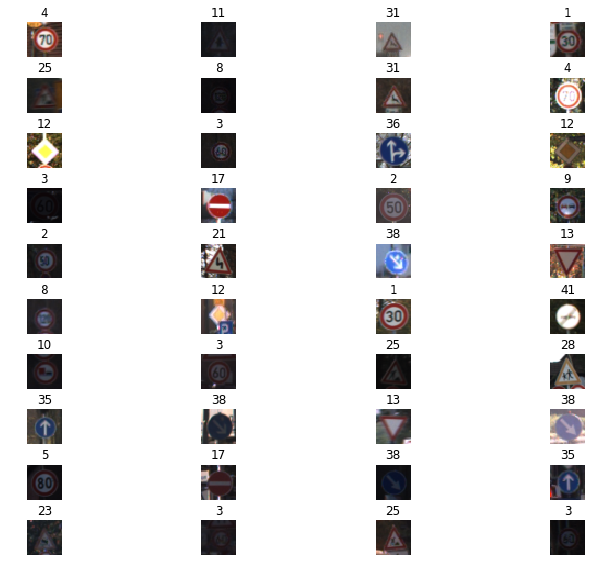

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
%matplotlib inline
fig, axs = plt.subplots(10,4, figsize=(10, 10))
fig.subplots_adjust(wspace=4)
axs = axs.ravel()
for i in range(40):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

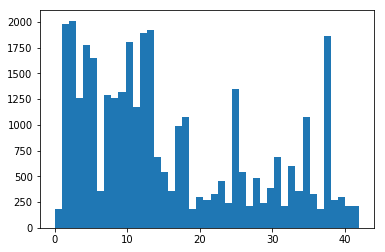

In [4]:
## display histogram
plt.hist(y_train,bins=43);

## Describe how you process the data. why did you choose that technique?
solution - 
Normalizing the training and testing dataset to have a mean 0 and in the range of 0.8 to 0.1
1. Transforming the intensity of all the features which will the optimizer to converge smoothly.
2. The given range will help ensure the intermediate numbers generated bby matrix multiplication will not grow to be too large. 

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2
import numpy as np
import tensorflow as tf

# augmentation
# normalize the data 
def normalize(data):
    return data / 255 * 0.8 + 0.1

X_train = normalize(X_train) 
X_test = normalize(X_test) 
X_valid = normalize(X_valid)

# converting the image into grayscale
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

X_train = X_train_gray
X_valid = X_valid_gray
X_test = X_test_gray

print(X_train.shape)

(34799, 32, 32, 1)


## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [6]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# shuffle the training set
X_train, y_train = shuffle(X_train, y_train)

# split the training set into training set and validation set
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, 
                                                                test_size=0.20, random_state=42)

print("New X_train size:",len(X_train))
print("X_validation size:",len(X_validation))

New X_train size: 27839
X_validation size: 6960


## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [7]:
import tensorflow as tf

EPOCHS = 60
BATCH_SIZE = 128
print("done")

done


## TODO: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [8]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
import tensorflow as tf


from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='convolution1')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='convolution2')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [9]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
print("done")

done


## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [10]:
rate = 0.00091

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
print("done")

done


## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [11]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
print("done")

done


## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.577

EPOCH 2 ...
Validation Accuracy = 0.787

EPOCH 3 ...
Validation Accuracy = 0.847

EPOCH 4 ...
Validation Accuracy = 0.885

EPOCH 5 ...
Validation Accuracy = 0.912

EPOCH 6 ...
Validation Accuracy = 0.929

EPOCH 7 ...
Validation Accuracy = 0.935

EPOCH 8 ...
Validation Accuracy = 0.936

EPOCH 9 ...
Validation Accuracy = 0.951

EPOCH 10 ...
Validation Accuracy = 0.946

EPOCH 11 ...
Validation Accuracy = 0.951

EPOCH 12 ...
Validation Accuracy = 0.958

EPOCH 13 ...
Validation Accuracy = 0.965

EPOCH 14 ...
Validation Accuracy = 0.960

EPOCH 15 ...
Validation Accuracy = 0.955

EPOCH 16 ...
Validation Accuracy = 0.970

EPOCH 17 ...
Validation Accuracy = 0.974

EPOCH 18 ...
Validation Accuracy = 0.970

EPOCH 19 ...
Validation Accuracy = 0.970

EPOCH 20 ...
Validation Accuracy = 0.970

EPOCH 21 ...
Validation Accuracy = 0.962

EPOCH 22 ...
Validation Accuracy = 0.968

EPOCH 23 ...
Validation Accuracy = 0.975

EPOCH 24 ...
Validation Accura

Q2. The submission provides details of the characteristics and qualities of the architecture, including the type of model used, the number of layers, and the size of each layer. Visualizations emphasizing particular qualities of the architecture are encouraged.
Solution -
1. Splitting the dataset into training and testing datasets.
2. Convulation layers - 2, Filter size - 5x5, number of filters = 6, 16
3. Max-pool layers - 2
4. Fully connected layers - 2
5. relu activation function


Q3. Type of model, architecture, layers and the final pipeline
Solution - 
1. InputLayer: 32, 32, 1. Normalized images are passed
   ConvulationLayer1 output: 28, 28, 6. Bias values of size 6 and weight values of size - 5,5,1,6 and strides (1,1,1,1) 
2. Relu activation layer
3. Max pooling layer - Size (2,2) strides = 2,2.
4. Output: 14,14,6

5. ConvulationLayer2 output: 10, 10, 16. Bias values of size 16 and weight values of size - 5,5,6,16 and strides (1,1,1,1) 
6. Relu activation layer
7. Max pooling layer - Size (2,2) strides = 2,2.
8. Output: 5,5,16

9. fc1 layer : size (400,120). Fully connected layer.
10. Relu activation layer
11. fc2 layer: size (120,43). Fully connected Layer.
This is the final layer that produces the layer of 43 class logits.

Q3. how the model is trained by discussing what optimizer is used, batch size, number of epochs and values for hyperparameters.
Solution - 
1. The model is trained using AdamOptimizer with a learning rate of 0.00071
2. Batch size used is 128
3. Number of epochs 60
4. Values of other hyperparameters mean = 0, stddev = 0.1

Q4. Describes the appriach to finding a solution. Accuracy on the validation should be greater than 0.93
Solution - 
1. Normalize the data
2. Splitt the training set into train and validation sets
3. Construct the LeNet architecture and run the same for 60 epochs with a batch size of 128. Validation accuracy - 
4. Shuffle the data every time for running a new simulation with varying parameters.
5. Applied different transformation techniques on the images such as flipping, rotating etc. Resulting in improved accuracy.
6. Tried with different epochs and batch size with varying results.
7. After getting an accuracy of more than 97%, saved the model.

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

### Step 3: Test a Model on New Images
Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.
You may find signnames.csv useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(18, 32, 32, 3)
(18, 32, 32, 1)


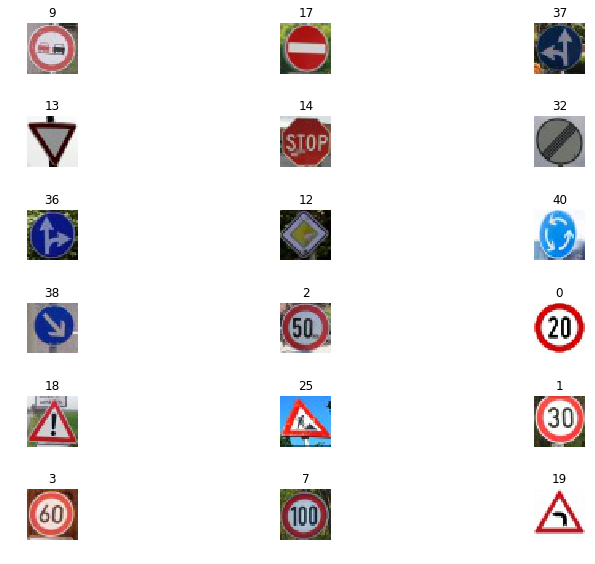

In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
# Importing the images, and let's take a look at what we have!
import os
import cv2 as cv
import matplotlib.image as mpimg
local_images = os.listdir("local/")
local_images = local_images[0:18]
local_labels = np.array([9, 17, 37, 13, 14, 32, 36, 12, 40, 38, 2, 0, 18, 25, 1, 3, 7, 19])
test_sets = []
for i in local_images:
    i = 'local/' + i
    image = mpimg.imread(i)
    test_sets.append(image)
    
fig, axs = plt.subplots(6,3, figsize=(10, 10))
fig.subplots_adjust(wspace=4)
axs = axs.ravel()
for i in range(len(local_images)):
    image = test_sets[i]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(local_labels[i])
input_test_sets = np.array(test_sets)
print(input_test_sets.shape)

input_test_sets = np.sum(input_test_sets/3, axis=3, keepdims=True)
print(input_test_sets.shape)

normImage = normalize(input_test_sets)


In [14]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    private_images_accuracy = evaluate(normImage, local_labels)
    print("My Images Accuracy = {:.3f}".format(private_images_accuracy))
    
    softmax = tf.nn.softmax(logits)
    probs = sess.run(softmax, feed_dict={x: normImage, y: local_labels})

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.901
My Images Accuracy = 0.611


In [17]:
count = 0
for index in range(len(probs)):
    probabilities = probs[index]
    for i in range(len(probabilities)):
        if probabilities[i] > 0.5:
            print('Label=', local_labels[index], ',Predicted=', i, " Probability= " ,probabilities[i])
            if int(local_labels[index]) != int(i):
                count += 1

print(count, 'wrong predictions')

Label= 9 ,Predicted= 9  Probability=  1.0
Label= 17 ,Predicted= 17  Probability=  1.0
Label= 37 ,Predicted= 37  Probability=  1.0
Label= 13 ,Predicted= 13  Probability=  1.0
Label= 14 ,Predicted= 40  Probability=  0.872117
Label= 32 ,Predicted= 6  Probability=  0.983387
Label= 36 ,Predicted= 36  Probability=  0.758705
Label= 12 ,Predicted= 12  Probability=  1.0
Label= 40 ,Predicted= 12  Probability=  0.990531
Label= 38 ,Predicted= 38  Probability=  1.0
Label= 2 ,Predicted= 6  Probability=  0.75003
Label= 0 ,Predicted= 0  Probability=  0.999999
Label= 18 ,Predicted= 18  Probability=  1.0
Label= 25 ,Predicted= 22  Probability=  0.690946
Label= 1 ,Predicted= 40  Probability=  1.0
Label= 3 ,Predicted= 2  Probability=  0.577345
Label= 7 ,Predicted= 7  Probability=  0.998848
Label= 19 ,Predicted= 19  Probability=  0.999999
7 wrong predictions


In [20]:

with tf.Session() as sess:
    prediction = sess.run(tf.nn.top_k(probs, k=5, sorted=True))
    
for i in range(len(predicts[0])):
    print('Image', i, 'probabilities:', prediction[0][i], '\n and predicted classes:', prediction[1][i])

Image 0 probabilities: [  1.00000000e+00   7.11951609e-10   5.38830726e-14   1.46916137e-14
   9.29381838e-18] 
 and predicted classes: [ 9 16 10 41 40]
Image 1 probabilities: [  1.00000000e+00   8.00983932e-20   4.69281792e-20   1.53033083e-22
   2.09900874e-25] 
 and predicted classes: [17 26 34 14 12]
Image 2 probabilities: [  1.00000000e+00   3.25836146e-12   9.98361763e-22   9.75327731e-22
   1.12564314e-23] 
 and predicted classes: [37 21 40 31 30]
Image 3 probabilities: [ 1.  0.  0.  0.  0.] 
 and predicted classes: [13  0  1  2  3]
Image 4 probabilities: [ 0.87211698  0.09241523  0.02047266  0.01041844  0.00349955] 
 and predicted classes: [40 12 26 14  1]
Image 5 probabilities: [  9.83386815e-01   1.65867321e-02   2.65087201e-05   7.15060955e-10
   1.04320878e-10] 
 and predicted classes: [ 6 32 41 42 36]
Image 6 probabilities: [  7.58704960e-01   2.12890014e-01   2.67830826e-02   8.06153927e-04
   2.96514278e-04] 
 and predicted classes: [36 41 40 12 38]
Image 7 probabilities

Q5. Choose 5 images of traffic signs and provide them in the report. are there any particular qualities of the image that might make classification difficult.
Solution - I have selected 18 traffic signs from the web which corresponds to the classes present in the train dataset. 
these images have a different arrow styles and blurred and different contrast level. some of the images have a white and black background and the brightness levels are different.

Q6. Difference between the accuracy of the captured pictures when compared to testing on the dataset. The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate.
Solution - 
7 of the traffic signs are classified wrongly. Accuracy is mostly more than 60% for 18 images. For 5 images the classifier was able to classify with an accuracy of more than 95%.